In [1]:
import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
import exp_lib.data_manager
import scipy.stats
import math
from matplotlib.colors import LinearSegmentedColormap

In [2]:
sns.set_theme(context="notebook", style="white")
def get_color(id, count):
    def lerp(a, b, x):
        return a * (1-x) + b * x

    x = (id+1) / count
    return ((lerp(1, 0, x)),(lerp(1, (33/255), x)),(lerp(1, (71/255), x)))

new_rc = {
    'xtick.bottom': True,
    'xtick.minor.bottom': True,
    'xtick.minor.visible': True,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.minor.left': True,
    'ytick.minor.visible': True,
    'ytick.right': False,
    'grid.color': "#d0d0d0",
    'grid.linestyle': "--",
    'axes.grid': True,
    'legend.loc': "best",
    'legend.frameon': True,
    'font.family': "serif",
    'font.serif': ["CMU Serif"],
    'font.weight': "bold",
    'font.titleweight': "bold",
    'axes.labelweight': "bold",
    'axes.titleweight': "bold",
    'axes.unicode_minus': False,
    'axes.prop_cycle': plt.cycler(color=[get_color(i, 8) for i in range(8)]),
    'savefig.bbox': "tight",
    'savefig.pad_inches': 0.1,

}
plt.rcParams |= new_rc
print(plt.rcParams)

def set_cycler(count, back = False):
    cols = [get_color(i, count) for i in range(count)]
    if back:
        cols = cols[::-1]
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cols)
    return plt.rcParams['axes.prop_cycle'].by_key()['color']

cycler = set_cycler(4)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: .15
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: 12.0
axes.labelweight: bold
axes.linewidth: 1.25
axes.prop_cycle: cycler('color', [(0.875, 0.8911764705882353, 0.9098039215686274), (0.75, 0.7823529411764706, 0.8196078431372549), (0.625, 0.6735294117647059, 0.7294117647058823), (0.5, 0.5647058823529412, 0.6392

In [3]:
def plot_experiment_rel(data, label, col="voltage", ax = None, scale = 1, **kwargs):
    if ax is None:
        ax = plt.gca()
    v = data[col]
    #Calculate baseline from the end of the measurements
    v_avg = np.average(v[-50:])
    ax.plot(data["freq"]/1e9, (v/v_avg-1)*100 * scale, label=label, **kwargs)
    
def plot_experiment_off(data, label, col="voltage", ax = None, scale = 1, **kwargs):
    if ax is None:
        ax = plt.gca()
    v = data[col]
    v_avg = np.average(v[-50:])
    ax.plot(data["freq"]/1e9, (v-v_avg) * scale, label=label, **kwargs)
    
def plot_experiment(data, label, col="voltage", ax = None, scale = 1, **kwargs):
    if ax is None:
        ax = plt.gca()
    v = data[col]
    ax.plot(data["freq"]/1e9, v * scale, label=label, **kwargs)
    

def plot_experiment_finish(ylabel, ax1 = None):
    if ax1 is None:
        ax1 = plt.gca()
    
    ax1.set_xlabel("Frequency [GHz]")
    ax1.set_ylabel(ylabel)

    plt.legend()

    plt.tight_layout()

def plot_experiment_rel_finish(type:str = "voltage", scaler="", ax1 = None):
    if(type == "voltage"):
        plot_experiment_finish(f"Voltage change [%{scaler}]", ax1)
    if(type == "current"):
        plot_experiment_finish(f"Current change [%{scaler}]", ax1)
def plot_experiment_off_finish(type:str = "voltage", scaler="", ax1 = None):
    if(type == "voltage"):
        plot_experiment_finish(f"Voltage change [V{scaler}]", ax1)
    if(type == "current"):
        plot_experiment_finish(f"Current change [A{scaler}]", ax1)

# Production plots

### Effect of output voltage on adjustable resistive divider converters
Theory says that we expect the fractional change to remain the same, regardless of output voltage and load

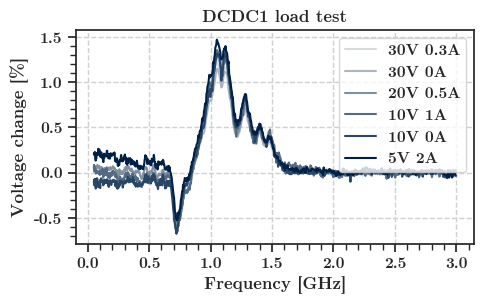

In [4]:
# DCDC converter 1 12V input
# CR load applied, as indicated in filename
plt.figure(figsize=(5,3))
set_cycler(6)
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc1_below_30V_100O").runs[0].data, "30V 0.3A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc1_below_30V_NL").runs[0].data, "30V 0A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc1_below_20V_40O").runs[0].data, "20V 0.5A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc1_below_10V_10O").runs[0].data, "10V 1A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc1_below_10V_NL").runs[0].data, "10V 0A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc1_below_5V_2O5").runs[0].data, "5V 2A", col="voltage_ds2302")

plot_experiment_rel_finish()
plt.savefig("../plots/dcdc1.pdf")
plt.title("DCDC1 load test")
plt.show()


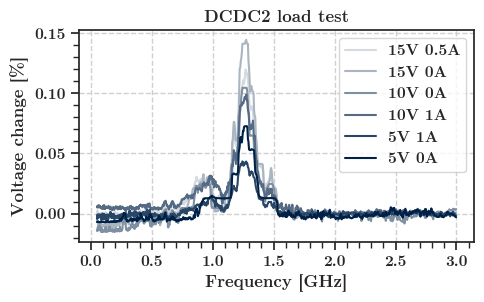

In [5]:
# DCDC converter 2 20V
# CR load applied, as indicated in filename
plt.figure(figsize=(5,3))
set_cycler(6)
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc2r2_below_15V_30O").runs[0].data, "15V 0.5A", col="voltage_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc2r2_below_15V_NL").runs[0].data, "15V 0A", col="voltage_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc2r2_below_10V_NL").runs[0].data, "10V 0A", col="voltage_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc2r2_below_10V_10O").runs[0].data, "10V 1A", col="voltage_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc2r2_below_5V_5O").runs[0].data, "5V 1A", col="voltage_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc2r2_below_5V_NL").runs[0].data, "5V 0A", col="voltage_ds2302")

plot_experiment_rel_finish()
plt.savefig("../plots/dcdc2.pdf")
plt.title("DCDC2 load test")
plt.show()


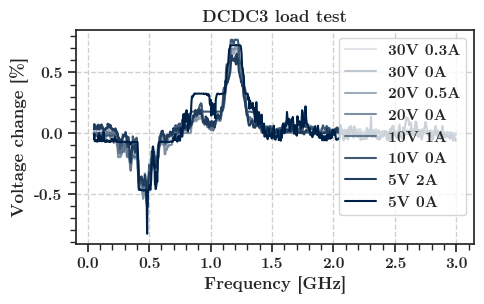

In [6]:
# DCDC converter 3 12V
# CR load applied, as indicated in filename
plt.figure(figsize=(5,3))
set_cycler(8)
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_30V_100O").runs[0].data, "30V 0.3A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_30V_NL").runs[0].data, "30V 0A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_20V_40O").runs[0].data, "20V 0.5A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_20V_NL").runs[0].data, "20V 0A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_10V_10O").runs[0].data, "10V 1A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_10V_NL").runs[0].data, "10V 0A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_5V_2O5").runs[0].data, "5V 2A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc3_below_5V_NL").runs[0].data, "5V 0A", col="voltage_ds2302")

plot_experiment_rel_finish()
plt.savefig("../plots/dcdc3.pdf")
plt.title("DCDC3 load test")
plt.show()


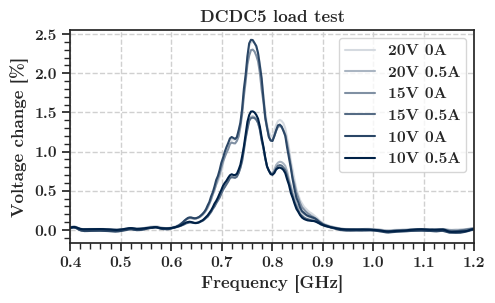

In [7]:
# DCDC converter 5 25V
# CR load applied, as indicated in filename
plt.figure(figsize=(5,3))
set_cycler(6)
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc5m2_below_20V_NL").runs[0].data, "20V 0A", "voltage_dl3021")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc5m2_below_20V_40O").runs[0].data, "20V 0.5A", "voltage_dl3021")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc5m2_below_15V_NL").runs[0].data, "15V 0A", "voltage_dl3021")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc5m2_below_15V_30O").runs[0].data, "15V 0.5A", "voltage_dl3021")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc5m2_below_10V_NL").runs[0].data, "10V 0A", "voltage_dl3021")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc5m2_below_10V_20O").runs[0].data, "10V 0.5A", "voltage_dl3021")

plot_experiment_rel_finish()
plt.xlim(0.4, 1.2)
plt.savefig("../plots/dcdc5.pdf")
plt.title("DCDC5 load test")
plt.show()


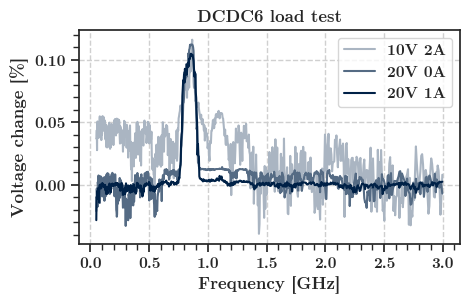

In [8]:
# DCDC converter 6 25V
# CR load applied, as indicated in filename
plt.figure(figsize=(5,3))
set_cycler(3)
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc6_below_10V_5O").runs[0].data, "10V 2A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc6_below_20V_NL").runs[0].data, "20V 0A", col="voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/dcdc_cv/dcdc6_below_20V_20R0").runs[0].data, "20V 1A", col="voltage_ds2302")

plot_experiment_rel_finish()
plt.savefig("../plots/dcdc6.pdf")
plt.title("DCDC6 load test")
plt.show()


### ACDC converters

Zener based theory assumes that 

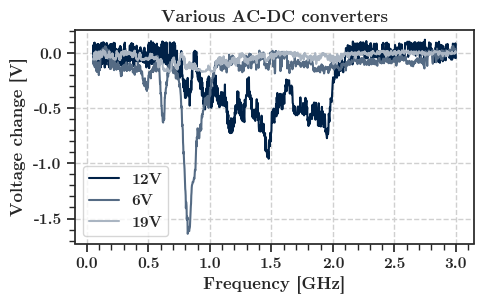

In [9]:
plt.figure(figsize=(5,3))
set_cycler(3,True)

plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/acdc_v/acdc1_exit_12V").runs[0].data, "12V", "voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/acdc_v/acdc2_exit_6V").runs[0].data, "6V", "voltage_ds2302")
plot_experiment_rel(exp_lib.data_manager.load_dataset("../data/acdc_v/acdc4_label_19V").runs[0].data, "19V", "voltage_ds2302")

plot_experiment_off_finish()
plt.savefig("../plots/acdcs.pdf")
plt.title("Various AC-DC converters")
plt.show()

### Testing CC drivers

Theory predits CC drivers to be a lot more sensitive
All CC systems compare current measurement to set current, meaning that the constant offset theory is expected

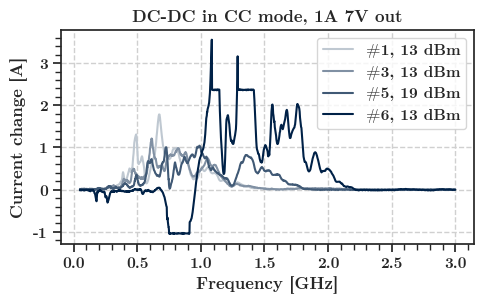

In [10]:
plt.figure(figsize=(5,3))
set_cycler(4,False)
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc1_below_1A_7V").runs[0].data, "#1, 13 dBm", col="current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc3_below_1A").runs[0].data, "#3, 13 dBm", col="current_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc5_below_1A").runs[0].data, "#5, 19 dBm", col="current_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc6_below_1A").runs[0].data, "#6, 13 dBm", col="current_ds2302")

plot_experiment_off_finish("current")
plt.savefig("../plots/dcdcs_CC.pdf")
plt.title("DC-DC in CC mode, 1A 7V out")
plt.show()

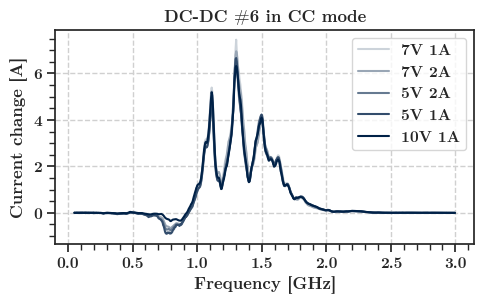

In [11]:
#Constant offset theory validated on DCDC6

plt.figure(figsize=(5,3))
set_cycler(5)
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc6_below_1A_7V").runs[0].data, "7V 1A", col="current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc6_below_2A_7V").runs[0].data, "7V 2A", col="current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc6_below_2A_5V").runs[0].data, "5V 2A", col="current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc6_below_1A_5V").runs[0].data, "5V 1A", col="current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/dcdc_cc/dcdc6_below_1A_10V").runs[0].data, "10V 1A", col="current_dl3021")

plot_experiment_off_finish("current")
plt.savefig("../plots/dcdc6_CC.pdf")
plt.title("DC-DC #6 in CC mode")
plt.show()

### Current sensors

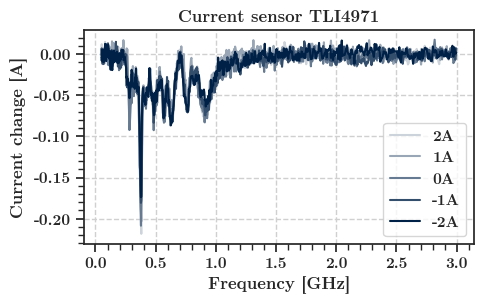

In [12]:
plt.figure(figsize=(5,3))
cycler = set_cycler(5)
#Analog sensor output from scope
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_2A").runs[0].data, "2A", col="sns_current_scope", color=cycler[0])
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_1A").runs[0].data, "1A", col="sns_current_scope", color=cycler[1])
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_0A").runs[0].data, "0A", col="sns_current_scope", color=cycler[2])
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_-1A").runs[0].data, "-1A", col="sns_current_scope", color=cycler[3])
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_-2A").runs[0].data, "-2A", col="sns_current_scope", color=cycler[4])

#Digital sensor output from ADC also on board
if False:
    plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_2A").runs[0].data, "2A - ADC", col="sns_current_sensor", color=cycler[0], linewidth=1.5, linestyle=":")
    plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_1A").runs[0].data, "1A - ADC", col="sns_current_sensor", color=cycler[1], linewidth=1.5, linestyle=":")
    plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_0A").runs[0].data, "0A - ADC", col="sns_current_sensor", color=cycler[2], linewidth=1.5, linestyle=":")
    plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_-1A").runs[0].data, "-1A - ADC", col="sns_current_sensor", color=cycler[3], linewidth=1.5, linestyle=":")
    plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs1_below_-2A").runs[0].data, "-2A - ADC", col="sns_current_sensor", color=cycler[4], linewidth=1.5, linestyle=":")

plot_experiment_off_finish("current")
plt.savefig("../plots/cs1.pdf")
plt.title("Current sensor TLI4971")
plt.show()

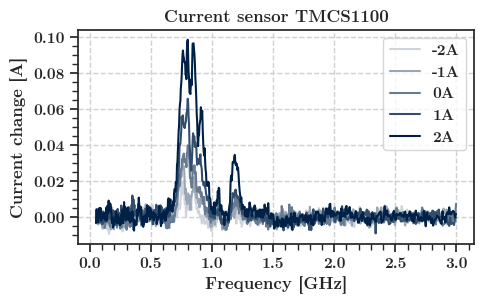

In [13]:
plt.figure(figsize=(5,3))
cycler = set_cycler(5, False)
# Analog sensor recoded by scope
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs2_above_-2A").runs[0].data, "-2A", col="sns_current_scope")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs2_above_-1A").runs[0].data, "-1A", col="sns_current_scope")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs2_above_0A").runs[0].data, "0A", col="sns_current_scope")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs2_above_1A").runs[0].data, "1A", col="sns_current_scope")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs2_above_2A").runs[0].data, "2A", col="sns_current_scope")

plot_experiment_off_finish("current")
plt.savefig("../plots/cs2.pdf")
plt.title("Current sensor TMCS1100")
plt.show()

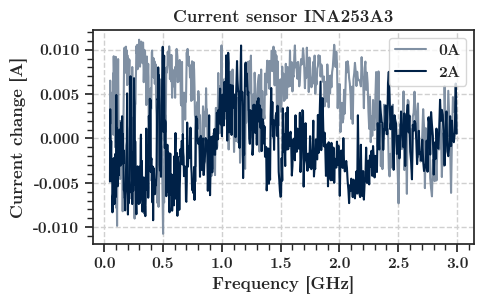

In [14]:
plt.figure(figsize=(5,3))
set_cycler(2)
# Analog sensor recoded by scope
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs3_above_0A").runs[0].data, "0A", col="sns_current_scope")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs3_above_2A").runs[0].data, "2A", col="sns_current_scope")

plot_experiment_off_finish("current")
plt.savefig("../plots/cs3.pdf")
plt.title("Current sensor INA253A3")
plt.show()

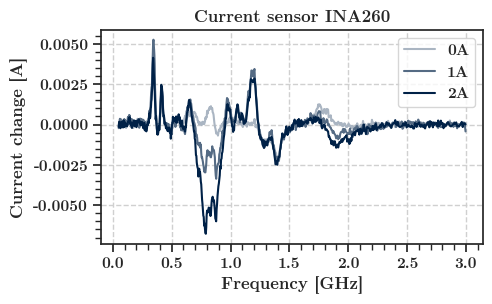

In [15]:
plt.figure(figsize=(5,3))
set_cycler(3)
# Value reported by digital sensor
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs4_below_0A").runs[0].data, "0A", col="sns_current_sensor")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs4_below_1A").runs[0].data, "1A", col="sns_current_sensor")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/cs/cs4_below_2A").runs[0].data, "2A", col="sns_current_sensor")


plot_experiment_off_finish("current")
plt.savefig("../plots/cs4.pdf")
plt.title("Current sensor INA260")
plt.show()

### Effect of Li-ion charger setting

Theory predicts either constant relaitve or absolute change.

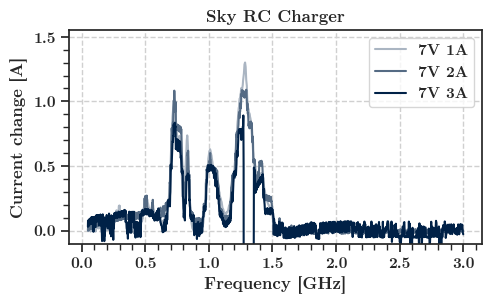

In [16]:
plt.figure(figsize=(5,3))
set_cycler(3)
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg3_wire_1A").runs[0].data, "7V 1A", col="current_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg3_wire_2A").runs[0].data, "7V 2A", col="current_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg3_wire_3A").runs[0].data, "7V 3A", col="current_ds2302")
plot_experiment_off_finish("current")
plt.ylim(-0.1,None)
plt.savefig("../plots/chg3.pdf")
plt.title("Sky RC Charger")
plt.show()

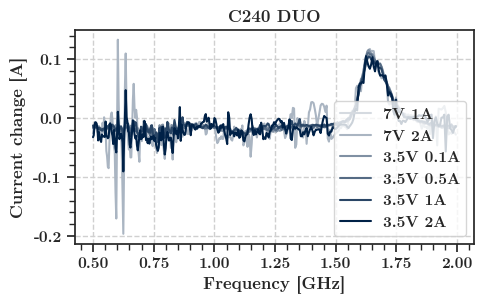

In [17]:
# Chg 4
# CR load applied, as indicated in filename
# 10W amp used
plt.figure(figsize=(5,3))
set_cycler(6)
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg4_exit_1A_7V").runs[0].data, "7V 1A", "current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg4_exit_2A_7V").runs[0].data, "7V 2A", "current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg4_exit_0A1_3V5").runs[0].data, "3.5V 0.1A", "current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg4_exit_0A5_3V5").runs[0].data, "3.5V 0.5A", "current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg4_exit_1A_3V5").runs[0].data, "3.5V 1A", "current_dl3021")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg4_exit_2A_3V5").runs[0].data, "3.5V 2A", "current_dl3021")


plot_experiment_off_finish("current")
plt.savefig("../plots/chg4.pdf")
plt.title("C240 DUO")
plt.show()


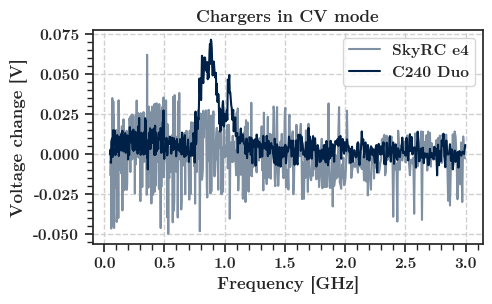

In [18]:
plt.figure(figsize=(5,3))
set_cycler(2)
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg3_wire_cv_8V4").runs[0].data, "SkyRC e4", "voltage_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg4_below_cv_4V2").runs[0].data, "C240 Duo", "voltage_ds2302")


plot_experiment_off_finish()
plt.savefig("../plots/chg_cv.pdf")
plt.title("Chargers in CV mode")
plt.show()


### Effect of power

Theory predices effect ~ Tx power

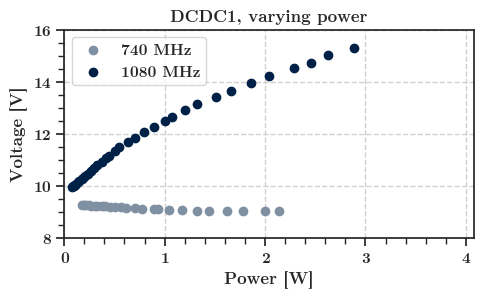

In [19]:
plt.figure(figsize=(5,3))


power_data_dcdc1_low = exp_lib.data_manager.load_dataset("../data/pow2/dcdc1").runs[0]
plt.scatter(10**(power_data_dcdc1_low.data["dbm_pwm"]/10-3), power_data_dcdc1_low.data["voltage_dl3021"], label="740 MHz")
power_data_dcdc1_high = exp_lib.data_manager.load_dataset("../data/pow2/dcdc1").runs[1]
plt.scatter(10**(power_data_dcdc1_high.data["dbm_pwm"]/10-3), power_data_dcdc1_high.data["voltage_dl3021"], label="1080 MHz")

plt.xlim((0, None))
plt.xlabel("Power [W]")
plt.ylim((8, 16))
plt.ylabel("Voltage [V]")

plt.legend()

plt.tight_layout()
plt.savefig("../plots/power_dcdc1.pdf")
plt.title("DCDC1, varying power")
plt.show()


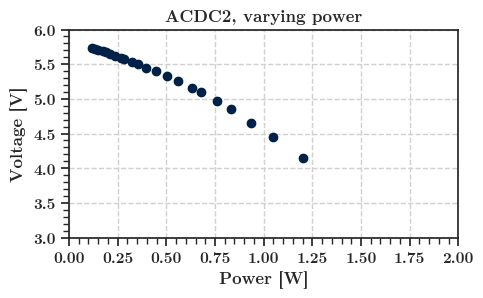

In [20]:
plt.figure(figsize=(5,3))

set_cycler(1)

power_data_acdc2 = exp_lib.data_manager.load_dataset("../data/pow2/acdc2").runs[0]
plt.scatter(10**(power_data_acdc2.data["dbm_pwm"]/10-3), power_data_acdc2.data["voltage_dl3021"], label="")

plt.xlim((0, 2))
plt.xlabel("Power [W]")
plt.ylim((3, 6))
plt.ylabel("Voltage [V]")

plt.tight_layout()
plt.savefig("../plots/power_acdc2.pdf")
plt.title("ACDC2, varying power")
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


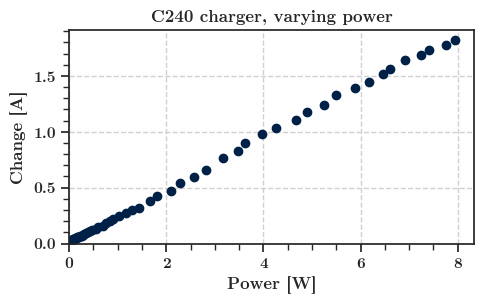

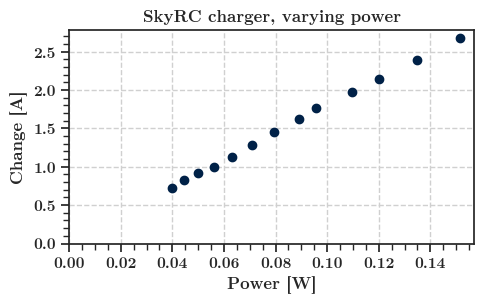

In [21]:
plt.figure(figsize=(5,3))

cycler = set_cycler(1)

#Un-attacked: 1A
power_data_chg4 = exp_lib.data_manager.load_dataset("../data/pow2/chg4").merge()
plt.scatter(10**(power_data_chg4.data["dbm_pwm"]/10-3), power_data_chg4.data["current_dl3021"] - 1, label="C240 Duo, 1A CC", c=cycler[0])

plt.xlim((0, None))
plt.xlabel("Power [W]")
plt.ylim((0, None))
plt.ylabel("Change [A]")

plt.tight_layout()
plt.savefig("../plots/power_chg4.pdf")
plt.title("C240 charger, varying power")
plt.show()


plt.figure(figsize=(5,3))

#Un-attacked: set to 1A, really 1.1A
power_data_chg3 = exp_lib.data_manager.load_dataset("../data/pow2/chg3").merge()
plt.scatter(10**(power_data_chg3.data["dbm_pwm"]/10-3), power_data_chg3.data["current_dl3021"] - 1.1, label="SkyRC, 1A CC", color=cycler[0])

plt.xlim((0, None))
plt.xlabel("Power [W]")
plt.ylim((0, None))
plt.ylabel("Change [A]")

plt.tight_layout()
plt.savefig("../plots/power_chg3.pdf")
plt.title("SkyRC charger, varying power")
plt.show()

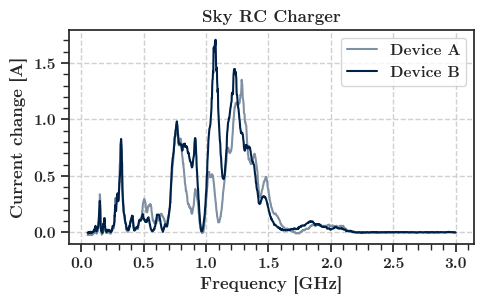

In [22]:
plt.figure(figsize=(5,3))
set_cycler(2)
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg3_wire_1A_2").runs[0].data, "Device A", col="current_ds2302")
plot_experiment_off(exp_lib.data_manager.load_dataset("../data/chg/chg2_wire_1A_2").runs[0].data, "Device B", col="current_ds2302")
plot_experiment_off_finish("current")
plt.legend()
plt.ylim(-0.1,None)
plt.savefig("../plots/chg2-3.pdf")
plt.title("Sky RC Charger")
plt.show()

### Ranged plot

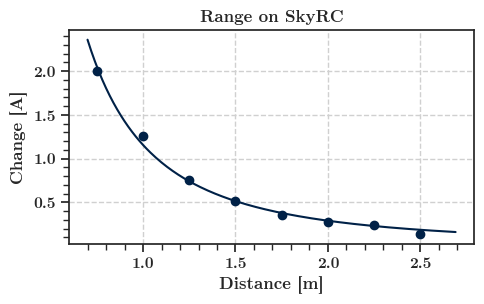

In [23]:
ranged_data = np.array([[2.5, 2.25, 2, 1.75, 1.5, 1.25, 1, 0.75], [1.15, 1.25, 1.29, 1.37, 1.52, 1.77, 2.27, 3.01]])

estimate, zero, _, _, _ = scipy.stats.linregress(1/ranged_data[0]**2, ranged_data[1])

set_cycler(1)
plt.figure(figsize=(5,3))
plt.scatter(ranged_data[0], ranged_data[1] - zero)
d = np.arange(0.7, 2.7, 0.01)
plt.plot(d, estimate / (d**2))
plt.xlabel("Distance [m]")
plt.ylabel("Change [A]")
plt.tight_layout()
plt.savefig("../plots/ranged.pdf")
plt.title("Range on SkyRC")
plt.show()

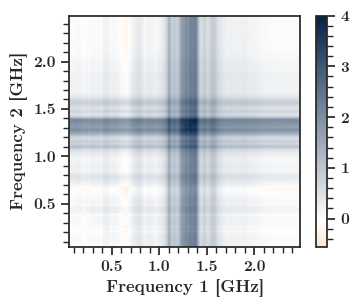

In [24]:

run = exp_lib.data_manager.load_dataset("../data/mf/dcdc6").runs[0]

plt.figure(figsize=(4,3))

# Re-order data as grid

freqs = np.unique(run.data["freq1"])
freq_lookup = {v: i for i, v in enumerate(freqs)}
grid = np.zeros((len(freqs), len(freqs)))

for f1, f2, d in zip(
    run.data["freq1"],
    run.data["freq2"],
    run.data["current_dl3021"]
    ):
    grid[freq_lookup[f1],freq_lookup[f2]] = d

colors = [
    (0, (1, 0.9, 0.8)),
    (0.5/4.5, 'white'),
    (1, (0,33/255,71/255))
]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
plt.grid(False)
art = plt.pcolormesh(freqs / 1e9, freqs / 1e9, grid - run.data["current_dl3021"][0], shading='gouraud', cmap=cmap)
art.set_rasterized(True)
plt.gca().set_aspect('equal')

plt.xlabel("Frequency 1 [GHz]")
plt.ylabel("Frequency 2 [GHz]")
plt.clim(4,-0.5)
plt.colorbar()
plt.savefig("../plots/dualsweep.pdf")
